# Detecting Insults in Social Commentary

Because this dataset is far too small to use a neural network (which was my last approach to NLP), I'm going to experiment with some machine learning algorithms from scikit-learn to identify insults in social commentary.

When this competition ran on Kaggle 5 years ago, the best AUC ROC score was 0.84249 on the private test set (which I also have access to, and will be using as my test set). Let's see if, using all of the new tools available (i.e. GloVe vectrs), I can better this score.

## Visualizing the data

To better understand the data, let's visualize the comments using PCA and t-SNE to reduce the dimensions of each comment from 300 to 2. 

In [1]:
% matplotlib inline

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from tqdm import *

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

Loading the data

In [25]:
glove_comments = np.load('glove_array.npy')

In [26]:
glove_comments.shape

(3947, 300)

In [20]:
data = pd.read_csv('train.csv')

In [5]:
data.head()

,Insult,Date,Comment
0,1,20120618192155Z,"""You fuck your dad."""
1,0,20120528192215Z,"""i really don't understand your point.\xa0 It ..."
2,0,NaN,"""A\\xc2\\xa0majority of Canadians can and has ..."
3,0,NaN,"""listen if you dont wanna get married to a man..."
4,0,20120619094753Z,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd..."


I ultimately want to use t-SNE (because it is much better at visualizations than PCA, see why [here](https://medium.com/@gabrieltseng/clustering-and-collaborative-filtering-visualizing-clusters-using-t-sne-f9718e7491e6)), but as per t-SNE's creator's recommendations, I'm first going to use PCA to reduce the dimensions of glove_comments from 30,000 to 50. 

In [27]:
glove_comments_50dim = PCA(n_components = 50).fit_transform(glove_comments)

In [28]:
glove_comments_50dim.shape

(3947, 50)

Okay. I can now use t-SNE to reduce this to 2 dimensions. I'm going to use perplexity 50, because this should roughly work. 

In [29]:
glove_comments_tSNE = TSNE(n_components = 2, perplexity = 50).fit_transform(glove_comments_50dim)

Okay! Let's take a look at this. 

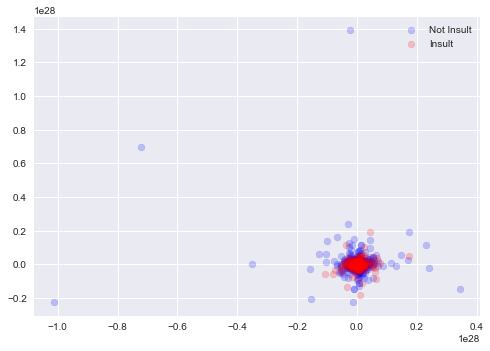

In [24]:
plt.scatter(glove_comments_tSNE[:,0][data.Insult == 0],glove_comments_tSNE[:,1][data.Insult == 0], 
            color = 'b', alpha = 0.2, label = 'Not Insult')
plt.scatter(glove_comments_tSNE[:,0][data.Insult == 1],glove_comments_tSNE[:,1][data.Insult == 1], 
            color = 'r', alpha = 0.2, label = 'Insult')

plt.legend()

Hmm. It doesn't seem that I'll be able to extract too much by clustering; most of the comments seem to be focussed around the origin